In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
sns.set_theme(style='whitegrid')

# Plot NSL-KDD result

In [143]:
result_nslkdd = pd.read_csv('./result/nslkdd/five/total_result_nslkdd.csv')
result_nslkdd

,sample_rate,feature_num,type,precision,recall,f1_score,fpr,acc,training_time,testing_time
0,10,1,dos,NaN,0.000000,NaN,0.000000,0.364578,8.330337,1.477645
1,10,1,normal,0.465417,1.000000,0.635192,1.000000,0.465417,8.330337,1.477645
2,10,1,probe,0.907472,1.000000,0.951491,1.000000,0.907472,8.330337,1.477645
3,10,1,r2l,0.992101,1.000000,0.996035,1.000000,0.992101,8.330337,1.477645
4,10,1,u2r,0.999587,1.000000,0.999794,1.000000,0.999587,8.330337,1.477645
...,...,...,...,...,...,...,...,...,...,...
2045,100,41,dos,0.988062,0.995741,0.991886,0.020970,0.989649,11.241451,1.651730
2046,100,41,normal,0.985941,0.960172,0.972883,0.011922,0.975090,11.241451,1.651730
2047,100,41,probe,0.996051,0.994855,0.995452,0.038692,0.991752,11.241451,1.651730
2048,100,41,r2l,0.992101,1.000000,0.996035,1.000000,0.992101,11.241451,1.651730


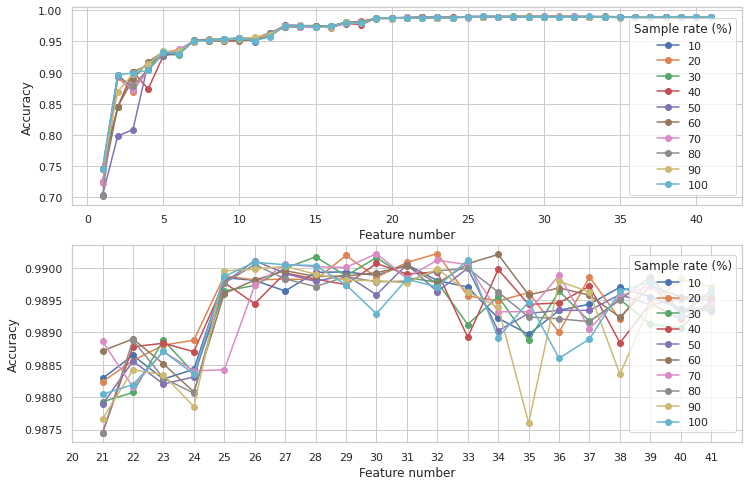

In [144]:
plt.figure(figsize=(12, 8))
ax1 = plt.subplot(2, 1, 1)

for idx, df in result_nslkdd.groupby(['sample_rate', 'feature_num']).mean().reset_index().groupby('sample_rate'):
    plt.plot(df['feature_num'], df['acc'], 'o-', label=idx)
plt.xlabel('Feature number')
plt.ylabel('Accuracy')
plt.legend(title='Sample rate (%)', loc='right')

ax2 = plt.subplot(2, 1, 2)
floor = 20
for idx, df in result_nslkdd.groupby(['sample_rate', 'feature_num']).mean().reset_index().groupby('sample_rate'):
    plt.plot(df['feature_num'].iloc[floor:], df['acc'].iloc[floor:], 'o-', label=idx)
plt.xlabel('Feature number')
plt.ylabel('Accuracy')
plt.xticks(range(floor, 42))
plt.legend(title='Sample rate (%)', loc='right')

In [145]:
def create_table(df, string_col):
    total = ''
    for row in df.values:
        tmp = '& '
        for idx, item in enumerate(row):
            if idx in string_col:
                item = str(item)
            else:
                item = np.round(item, 4)
            tmp += str(item) + ' & '
        tmp = tmp[:-2]
        tmp += '\\\\'
        tmp += '\n'
        total += tmp
    return total

In [146]:
type2type = {
    'dos': 'DoS',
    'normal': 'Normal',
    'probe': 'Probe',
    'r2l': 'R2L',
    'u2r': 'U2R'
}

In [147]:
result_nslkdd_sample_rate = result_nslkdd.groupby(['sample_rate', 'feature_num', 'type']).mean().loc[:, 25, :].drop(['training_time', 'testing_time'], axis=1)
result_nslkdd_sample_rate_overall = result_nslkdd_sample_rate.groupby('sample_rate').mean()
result_nslkdd_sample_rate = result_nslkdd_sample_rate.reset_index()
result_nslkdd_sample_rate['type'] = result_nslkdd_sample_rate['type'].apply(lambda x: type2type[x])

In [148]:
table_nslkdd_five = create_table(result_nslkdd_sample_rate.drop('sample_rate', axis=1), string_col=[0])
print(table_nslkdd_five)

& DoS & 0.9877 & 0.9942 & 0.991 & 0.0216 & 0.9885 \\
& Normal & 0.9854 & 0.9622 & 0.9736 & 0.0124 & 0.9758 \\
& Probe & 0.9972 & 0.9955 & 0.9963 & 0.0278 & 0.9933 \\
& R2L & 0.9921 & 1.0 & 0.996 & 1.0 & 0.9921 \\
& U2R & 0.9996 & 1.0 & 0.9998 & 1.0 & 0.9996 \\
& DoS & 0.9876 & 0.9955 & 0.9915 & 0.0217 & 0.9892 \\
& Normal & 0.9875 & 0.96 & 0.9735 & 0.0106 & 0.9757 \\
& Probe & 0.9962 & 0.9958 & 0.996 & 0.0369 & 0.9928 \\
& R2L & 0.9921 & 1.0 & 0.996 & 1.0 & 0.9921 \\
& U2R & 0.9996 & 1.0 & 0.9998 & 1.0 & 0.9996 \\
& DoS & 0.9877 & 0.9945 & 0.9911 & 0.0215 & 0.9886 \\
& Normal & 0.9858 & 0.9605 & 0.973 & 0.012 & 0.9752 \\
& Probe & 0.9963 & 0.9956 & 0.9959 & 0.036 & 0.9926 \\
& R2L & 0.9921 & 1.0 & 0.996 & 1.0 & 0.9921 \\
& U2R & 0.9996 & 1.0 & 0.9998 & 1.0 & 0.9996 \\
& DoS & 0.9878 & 0.993 & 0.9904 & 0.0214 & 0.9878 \\
& Normal & 0.9858 & 0.9623 & 0.9739 & 0.012 & 0.976 \\
& Probe & 0.9966 & 0.996 & 0.9963 & 0.0328 & 0.9933 \\
& R2L & 0.9921 & 1.0 & 0.996 & 1.0 & 0.9921 \\
& U2R & 0.9

In [149]:
table_nslkdd_five_average = create_table(result_nslkdd_sample_rate.groupby('type').mean().drop('sample_rate', axis=1).reset_index(), string_col=[0])
print(table_nslkdd_five_average)

& DoS & 0.9874 & 0.9941 & 0.9907 & 0.0221 & 0.9882 \\
& Normal & 0.9859 & 0.9613 & 0.9734 & 0.0119 & 0.9756 \\
& Probe & 0.9965 & 0.9955 & 0.996 & 0.0338 & 0.9928 \\
& R2L & 0.9921 & 1.0 & 0.996 & 1.0 & 0.9921 \\
& U2R & 0.9996 & 1.0 & 0.9998 & 1.0 & 0.9996 \\



In [150]:
result_nslkdd_baseline = pd.read_csv('./result/nslkdd/five/baseline.csv')
result_nslkdd_baseline = result_nslkdd_baseline.groupby(['learner', 'type']).mean().drop(['C4.5', 'CART', 'KNN', 'RF']).drop('cv', axis=1)
result_nslkdd_baseline = result_nslkdd_baseline[['precision', 'recall', 'f1_score', 'fpr', 'acc']]

result_nslkdd_xgb_dnn = pd.read_csv('./result/nslkdd/five/xgboost_dnn.csv')
indices = [('XGB-DNN',x) for x in result_nslkdd_xgb_dnn['type']]
result_nslkdd_xgb_dnn.index = indices
result_nslkdd_xgb_dnn.drop('type', axis=1, inplace=True)

result_nslkdd_efs_dnn = result_nslkdd[result_nslkdd['sample_rate']==90][result_nslkdd['feature_num']==25].drop(['sample_rate', 'feature_num'], axis=1).reset_index()
indices = [('EFS-DNN',x) for x in result_nslkdd_efs_dnn['type']]
result_nslkdd_efs_dnn.index = indices
result_nslkdd_efs_dnn.drop(['index', 'type'], axis=1, inplace=True)

<ipython-input-150-bb7435f13ceb>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_nslkdd_efs_dnn = result_nslkdd[result_nslkdd['sample_rate']==90][result_nslkdd['feature_num']==25].drop(['sample_rate', 'feature_num'], axis=1).reset_index()


In [151]:
result_nslkdd_baseline = pd.concat([result_nslkdd_baseline, result_nslkdd_xgb_dnn])

In [152]:
learner = result_nslkdd_baseline.reset_index()['learner'].unique()
for l in learner:
    result_nslkdd_baseline.loc[l, 'train'] = result_nslkdd_baseline.loc[l].mean(1)['training_time']
    result_nslkdd_baseline.loc[l, 'test'] = result_nslkdd_baseline.loc[l].mean(1)['testing_time']
result_nslkdd_baseline = result_nslkdd_baseline.swaplevel(0, 1).drop(['training_time', 'testing_time']).swaplevel(0, 1)
result_nslkdd_baseline.columns = ['precision', 'recall', 'f1_score', 'fpr', 'acc', 'training_time', 'testing_time']

/home/hadoop/anaconda3/envs/ml/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [153]:
result_nslkdd_baseline = pd.concat([result_nslkdd_baseline, result_nslkdd_efs_dnn])

In [154]:
def create_df_five(df, metrics):
    df = df[metrics].unstack()
    df = df[['normal', 'dos', 'probe', 'r2l', 'u2r']]
    df['overall'] = df.mean(1)
    df = df.T
    df = df[['NB', 'SVC', 'lr', 'XGB-DNN', 'EFS-DNN']]
    return df

## Recall

In [155]:
result_nslkdd_recall = create_df_five(result_nslkdd_baseline, 'recall')
print(create_table(result_nslkdd_recall, string_col=[]))

& 0.9896 & 0.9285 & 0.9422 & 0.0 & 0.9619 \\
& 0.9064 & 0.9884 & 0.9895 & 1.0 & 0.9946 \\
& 0.9142 & 0.9903 & 0.9895 & 1.0 & 0.9956 \\
& 0.9745 & 0.9988 & 0.998 & 1.0 & 1.0 \\
& 0.9252 & 1.0 & 1.0 & 1.0 & 1.0 \\
& 0.942 & 0.9812 & 0.9838 & 0.8 & 0.9904 \\



## False alarm rate

In [156]:
result_nslkdd_fpr = create_df_five(result_nslkdd_baseline, 'fpr')
print(create_table(result_nslkdd_fpr, string_col=[]))

& 0.4066 & 0.0296 & 0.0302 & 0.0 & 0.0115 \\
& 0.0354 & 0.0265 & 0.0275 & 1.0 & 0.0215 \\
& 0.0829 & 0.1997 & 0.1631 & 1.0 & 0.0303 \\
& 0.5361 & 0.8028 & 0.4558 & 1.0 & 1.0 \\
& 0.1197 & 0.797 & 0.6803 & 1.0 & 1.0 \\
& 0.2361 & 0.3711 & 0.2714 & 0.8 & 0.4127 \\



## F1-score

In [157]:
result_nslkdd_f1 = create_df_five(result_nslkdd_baseline, 'f1_score')
print(create_table(result_nslkdd_f1, string_col=[]))

& 0.8057 & 0.9461 & 0.9532 & nan & 0.974 \\
& 0.9408 & 0.9867 & 0.9869 & 0.7771 & 0.9911 \\
& 0.951 & 0.985 & 0.9865 & 0.9515 & 0.9963 \\
& 0.985 & 0.9962 & 0.9972 & 0.996 & 0.996 \\
& 0.9611 & 0.9998 & 0.9998 & 0.9998 & 0.9998 \\
& 0.9287 & 0.9828 & 0.9847 & 0.9311 & 0.9915 \\



# Plot KDD-99 result

In [158]:
result_kdd99 = pd.read_csv('./result/kdd99/five/total_result_kdd99.csv')
result_kdd99

,sample_rate,feature_num,type,precision,recall,f1_score,fpr,acc,training_time,testing_time
0,10,1,dos,NaN,0.000000,NaN,0.000000,0.374844,10.882383,1.920478
1,10,1,normal,0.396700,1.000000,0.568051,1.000000,0.396700,10.882383,1.920478
2,10,1,probe,0.985363,1.000000,0.992627,1.000000,0.985363,10.882383,1.920478
3,10,1,r2l,0.993138,1.000000,0.996557,1.000000,0.993138,10.882383,1.920478
4,10,1,u2r,0.999643,1.000000,0.999821,1.000000,0.999643,10.882383,1.920478
...,...,...,...,...,...,...,...,...,...,...
2045,100,41,dos,0.989439,0.989105,0.989267,0.017611,0.986592,15.012047,2.485260
2046,100,41,normal,0.994081,0.962064,0.977800,0.003768,0.982677,15.012047,2.485260
2047,100,41,probe,0.993382,0.999185,0.996273,0.445885,0.992630,15.012047,2.485260
2048,100,41,r2l,0.993138,1.000000,0.996557,1.000000,0.993138,15.012047,2.485260


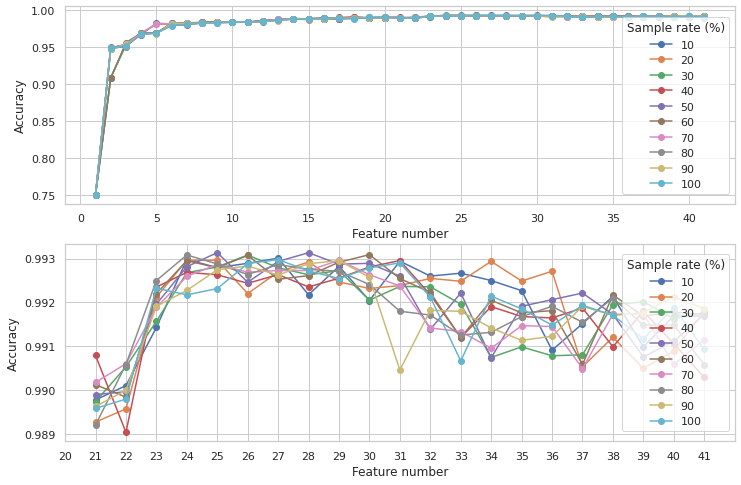

In [159]:
plt.figure(figsize=(12, 8))
ax1 = plt.subplot(2, 1, 1)

for idx, df in result_kdd99.groupby(['sample_rate', 'feature_num']).mean().reset_index().groupby('sample_rate'):
    plt.plot(df['feature_num'], df['acc'], 'o-', label=idx)
plt.xlabel('Feature number')
plt.ylabel('Accuracy')
plt.legend(title='Sample rate (%)', loc='right')

ax2 = plt.subplot(2, 1, 2)
floor = 20
for idx, df in result_kdd99.groupby(['sample_rate', 'feature_num']).mean().reset_index().groupby('sample_rate'):
    plt.plot(df['feature_num'].iloc[floor:], df['acc'].iloc[floor:], 'o-', label=idx)
plt.xlabel('Feature number')
plt.ylabel('Accuracy')
plt.xticks(range(floor, 42))
plt.legend(title='Sample rate (%)', loc='right')

In [160]:
result_kdd99_sample_rate = result_kdd99.groupby(['sample_rate', 'feature_num', 'type']).mean().loc[:, 25, :].drop(['training_time', 'testing_time'], axis=1)
result_kdd99_sample_rate_overall = result_kdd99_sample_rate.groupby('sample_rate').mean()
result_kdd99_sample_rate = result_kdd99_sample_rate.reset_index()
result_kdd99_sample_rate['type'] = result_kdd99_sample_rate['type'].apply(lambda x: type2type[x])

In [161]:
table_kdd99_five = create_table(result_kdd99_sample_rate.drop('sample_rate', axis=1), string_col=[0])
print(table_kdd99_five)

& DoS & 0.9893 & 0.9964 & 0.9928 & 0.018 & 0.991 \\
& Normal & 0.9943 & 0.9628 & 0.9783 & 0.0036 & 0.9831 \\
& Probe & 0.9981 & 0.999 & 0.9985 & 0.1287 & 0.9971 \\
& R2L & 0.9931 & 1.0 & 0.9966 & 1.0 & 0.9931 \\
& U2R & 0.9996 & 1.0 & 0.9998 & 1.0 & 0.9996 \\
& DoS & 0.9891 & 0.9969 & 0.9929 & 0.0184 & 0.9911 \\
& Normal & 0.9953 & 0.9633 & 0.979 & 0.003 & 0.9836 \\
& Probe & 0.9975 & 0.9989 & 0.9982 & 0.175 & 0.9965 \\
& R2L & 0.994 & 1.0 & 0.997 & 0.8788 & 0.9939 \\
& U2R & 0.9996 & 1.0 & 0.9998 & 1.0 & 0.9996 \\
& DoS & 0.9891 & 0.9972 & 0.9931 & 0.0184 & 0.9913 \\
& Normal & 0.994 & 0.9635 & 0.9785 & 0.0038 & 0.9832 \\
& Probe & 0.9984 & 0.9982 & 0.9983 & 0.1074 & 0.9967 \\
& R2L & 0.9931 & 1.0 & 0.9966 & 1.0 & 0.9931 \\
& U2R & 0.9996 & 1.0 & 0.9998 & 1.0 & 0.9996 \\
& DoS & 0.9893 & 0.995 & 0.9922 & 0.0179 & 0.9902 \\
& Normal & 0.9942 & 0.9638 & 0.9787 & 0.0037 & 0.9834 \\
& Probe & 0.9977 & 0.999 & 0.9984 & 0.1574 & 0.9968 \\
& R2L & 0.9931 & 1.0 & 0.9966 & 1.0 & 0.9931 \\
& U2

In [162]:
table_kdd99_five_average = create_table(result_kdd99_sample_rate.groupby('type').mean().drop('sample_rate', axis=1).reset_index(), string_col=[0])
print(table_kdd99_five_average)

& DoS & 0.9892 & 0.9962 & 0.9927 & 0.0182 & 0.9908 \\
& Normal & 0.994 & 0.9636 & 0.9786 & 0.0038 & 0.9833 \\
& Probe & 0.9982 & 0.9988 & 0.9985 & 0.1249 & 0.997 \\
& R2L & 0.9933 & 1.0 & 0.9966 & 0.9813 & 0.9933 \\
& U2R & 0.9996 & 1.0 & 0.9998 & 1.0 & 0.9996 \\



In [163]:
result_kdd99_baseline = pd.read_csv('./result/kdd99/five/baseline.csv')
result_kdd99_baseline = result_kdd99_baseline.groupby(['learner', 'type']).mean().drop(['C4.5', 'CART', 'KNN', 'RF']).drop('cv', axis=1)
result_kdd99_baseline = result_kdd99_baseline[['precision', 'recall', 'f1_score', 'fpr', 'acc']]

result_kdd99_xgb_dnn = pd.read_csv('./result/kdd99/five/xgboost_dnn.csv')
indices = [('XGB-DNN',x) for x in result_kdd99_xgb_dnn['type']]
result_kdd99_xgb_dnn.index = indices
result_kdd99_xgb_dnn.drop('type', axis=1, inplace=True)

result_kdd99_efs_dnn = result_kdd99[result_kdd99['sample_rate']==50][result_kdd99['feature_num']==25].drop(['sample_rate', 'feature_num'], axis=1).reset_index()
indices = [('EFS-DNN',x) for x in result_kdd99_efs_dnn['type']]
result_kdd99_efs_dnn.index = indices
result_kdd99_efs_dnn.drop(['index', 'type'], axis=1, inplace=True)

<ipython-input-163-1e574b3b3175>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_kdd99_efs_dnn = result_kdd99[result_kdd99['sample_rate']==50][result_kdd99['feature_num']==25].drop(['sample_rate', 'feature_num'], axis=1).reset_index()


In [164]:
result_kdd99_baseline = pd.concat([result_kdd99_baseline, result_kdd99_xgb_dnn])

In [165]:
learner = result_kdd99_baseline.reset_index()['learner'].unique()
for l in learner:
    result_kdd99_baseline.loc[l, 'train'] = result_kdd99_baseline.loc[l].mean(1)['training_time']
    result_kdd99_baseline.loc[l, 'test'] = result_kdd99_baseline.loc[l].mean(1)['testing_time']
result_kdd99_baseline = result_kdd99_baseline.swaplevel(0, 1).drop(['training_time', 'testing_time']).swaplevel(0, 1)
result_kdd99_baseline.columns = ['precision', 'recall', 'f1_score', 'fpr', 'acc', 'training_time', 'testing_time']

/home/hadoop/anaconda3/envs/ml/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [166]:
result_kdd99_baseline = pd.concat([result_kdd99_baseline, result_kdd99_efs_dnn])

## Recall

In [167]:
result_kdd99_recall = create_df_five(result_kdd99_baseline, 'recall')
print(create_table(result_kdd99_recall, string_col=[]))

& 0.9862 & 0.9775 & 0.9751 & 0.0 & 0.9643 \\
& 0.9958 & 0.9984 & 0.9985 & 1.0 & 0.9968 \\
& 0.8843 & 0.9996 & 0.9996 & 1.0 & 0.999 \\
& 0.9942 & 0.9989 & 0.9989 & 1.0 & 1.0 \\
& 0.9583 & 1.0 & 1.0 & 1.0 & 1.0 \\
& 0.9637 & 0.9949 & 0.9944 & 0.8 & 0.992 \\



## False alarm rate

In [168]:
result_kdd99_fpr = create_df_five(result_kdd99_baseline, 'fpr')
print(create_table(result_kdd99_fpr, string_col=[]))

& 0.2556 & 0.0029 & 0.0031 & 0.0 & 0.0033 \\
& 0.0302 & 0.0133 & 0.0163 & 1.0 & 0.0185 \\
& 0.0224 & 0.2139 & 0.1958 & 1.0 & 0.0989 \\
& 0.5395 & 0.1801 & 0.1871 & 1.0 & 0.9344 \\
& 0.2095 & 0.715 & 0.6402 & 1.0 & 1.0 \\
& 0.2114 & 0.225 & 0.2085 & 0.8 & 0.411 \\



## F1-score

In [169]:
result_kdd99_f1 = create_df_five(result_kdd99_baseline, 'f1_score')
print(create_table(result_kdd99_f1, string_col=[]))

& 0.8306 & 0.9864 & 0.985 & nan & 0.9793 \\
& 0.9889 & 0.9952 & 0.9944 & 0.7693 & 0.9929 \\
& 0.9384 & 0.9982 & 0.9984 & 0.9926 & 0.9988 \\
& 0.9952 & 0.9988 & 0.9988 & 0.9966 & 0.9968 \\
& 0.9786 & 0.9999 & 0.9999 & 0.9998 & 0.9998 \\
& 0.9464 & 0.9957 & 0.9953 & 0.9396 & 0.9935 \\



Text(0.5, 1.0, 'NSL-KDD')

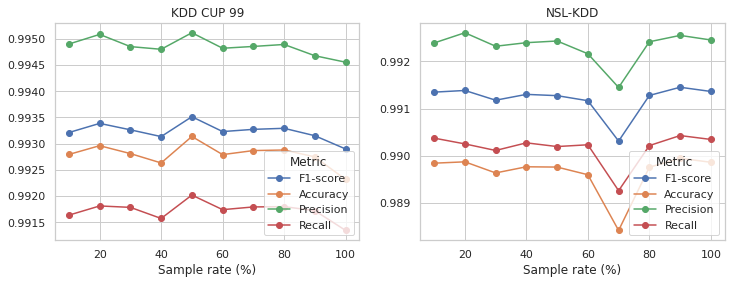

In [172]:
fig = plt.figure(figsize=(12, 4))

ax1 = plt.subplot(1, 2, 1)
result_kdd99_overall = result_kdd99_sample_rate.groupby('sample_rate').mean()
plt.plot(result_kdd99_overall.index, result_kdd99_overall['f1_score'], 'o-', label='F1-score')
plt.plot(result_kdd99_overall.index, result_kdd99_overall['acc'], 'o-', label='Accuracy')
plt.plot(result_kdd99_overall.index, result_kdd99_overall['precision'], 'o-', label='Precision')
plt.plot(result_kdd99_overall.index, result_kdd99_overall['recall'], 'o-', label='Recall')
# plt.plot(result_kdd99_overall.index, 1-result_kdd99_overall['fpr'], 'o-', label='1 - FAR')

plt.legend(title='Metric', loc='lower right')
plt.xlabel('Sample rate (%)')
plt.title('KDD CUP 99')

ax2 = plt.subplot(1, 2, 2)
result_nslkdd_overall = result_nslkdd_sample_rate.groupby('sample_rate').mean()
plt.plot(result_nslkdd_overall.index, result_nslkdd_overall['f1_score'], 'o-', label='F1-score')
plt.plot(result_nslkdd_overall.index, result_nslkdd_overall['acc'], 'o-', label='Accuracy')
plt.plot(result_nslkdd_overall.index, result_nslkdd_overall['precision'], 'o-', label='Precision')
plt.plot(result_nslkdd_overall.index, result_nslkdd_overall['recall'], 'o-', label='Recall')
# plt.plot(result_nslkdd_overall.index, 1-result_nslkdd_overall['fpr'], 'o-', label='1 - FAR')

plt.legend(title='Metric', loc='lower right')
plt.xlabel('Sample rate (%)')
plt.title('NSL-KDD')
